# import necessary packages

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr,spearmanr
from sklearn.metrics import r2_score
import statsmodels.api as sm

# import dataset

In [3]:
data=pd.read_excel("/home/unni/Documents/ml/dataset/auto-mpg.xlsx",na_values=["?"])

In [5]:
# top 5 rows
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


# exploratory data analysis

In [6]:
# column data types, non-null count etc
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


In [8]:
# 5 number summary
data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [9]:
# summary for object datatypes
data.describe(include="O")

,car name
count,398
unique,305
top,ford pinto
freq,6


In [10]:
# relationship between input features
correlation=data.corr(numeric_only=True)
correlation

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746,-0.562543
displacement,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164,-0.609409
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564,-0.581024
acceleration,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137,0.205873
model year,0.579267,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.455171,-0.581024,0.205873,0.180662,1.000000


## Data Cleaning

In [11]:
# Handle Nulls..if there are less number of null values , remove those...else use other methods like data imputation 
# here , remove rows having null value
data.dropna(axis='index',inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car name      392 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB


## Define Independent (x) and Dependent variable (y)

In [13]:
# independent variable..take only one feature initially
x=data.iloc[:,0]
print("-----",data.columns[0],"-----\n",x[:6])
print(x.shape)

# dependent variable / target variable
y=data.iloc[:,3]
print("\n-----",data.columns[3],"-----\n",y[:6])
print(y.shape)

----- mpg -----
 0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
5    15.0
Name: mpg, dtype: float64
(392,)

----- horsepower -----
 0    130.0
1    165.0
2    150.0
3    150.0
4    140.0
5    198.0
Name: horsepower, dtype: float64
(392,)


# Correlation Coefficients
(Pearson, Kendall etc)

- correlation coeff's lies between -1 (negative correlation) and 1 (strong/positive correlation). We can ignore the features whose correlation coeff = 0 (no correlation)
- we can plot the graph and confirm

In [14]:
# pearson correlation coeff
coeff_p,unk=pearsonr(x,y)
print("pearson correlation coeff =",coeff_p)

pearson correlation coeff = -0.7784267838977761


In [15]:
# spearman's rank correlation
coeff_s,unk=spearmanr(x,y)
print("spearman's rank correlation coeff =",coeff_s)

spearman's rank correlation coeff = -0.8536164024453882


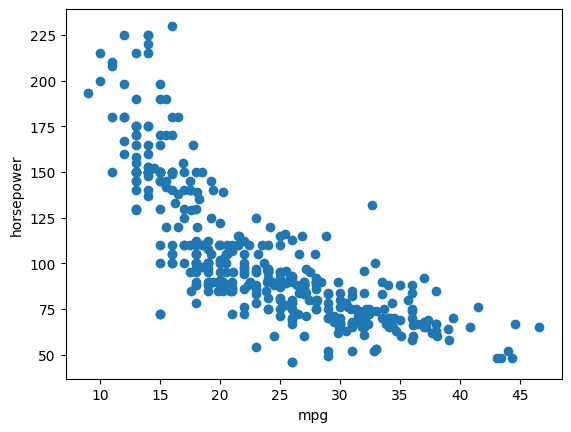

In [16]:
# plot graph to visualize...what can you infer from graph ??
plt.scatter(x,y)
plt.xlabel(data.columns[0])
plt.ylabel(data.columns[3])
plt.show()

## what can you infer from above graph ??

## Reshape to make it training compatible
<b>X</b> to be in form <b>(n_samples,n_features)</b> ; <b>Y</b> to be <b>(nsamples,)</b><br> 

In [17]:
# DO THIS ONLY IF YOU HAVE ONE INPUT FEATURE

x=np.array(x)
print(x)

x=x.reshape(-1, 1)
print(x)

[18.  15.  18.  16.  17.  15.  14.  14.  14.  15.  15.  14.  15.  14.
 24.  22.  18.  21.  27.  26.  25.  24.  25.  26.  21.  10.  10.  11.
  9.  27.  28.  25.  19.  16.  17.  19.  18.  14.  14.  14.  14.  12.
 13.  13.  18.  22.  19.  18.  23.  28.  30.  30.  31.  35.  27.  26.
 24.  25.  23.  20.  21.  13.  14.  15.  14.  17.  11.  13.  12.  13.
 19.  15.  13.  13.  14.  18.  22.  21.  26.  22.  28.  23.  28.  27.
 13.  14.  13.  14.  15.  12.  13.  13.  14.  13.  12.  13.  18.  16.
 18.  18.  23.  26.  11.  12.  13.  12.  18.  20.  21.  22.  18.  19.
 21.  26.  15.  16.  29.  24.  20.  19.  15.  24.  20.  11.  20.  19.
 15.  31.  26.  32.  25.  16.  16.  18.  16.  13.  14.  14.  14.  29.
 26.  26.  31.  32.  28.  24.  26.  24.  26.  31.  19.  18.  15.  15.
 16.  15.  16.  14.  17.  16.  15.  18.  21.  20.  13.  29.  23.  20.
 23.  24.  25.  24.  18.  29.  19.  23.  23.  22.  25.  33.  28.  25.
 25.  26.  27.  17.5 16.  15.5 14.5 22.  22.  24.  22.5 29.  24.5 29.
 33.  20.  18.  18.5

In [18]:
print(x.shape)
print(y.shape)

(392, 1)
(392,)


# Divide into Train and Test set
#### random_state -> default=None ; Controls the shuffling applied to the data before applying the split. Pass an int for reproducible output across multiple function calls.

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [20]:
print("x_train.count()=",len(x_train)) # x_train.count()
print("y_train.count()=",y_train.count())
print("x_test.count()=",len(x_test)) # x_test.count()
print("y_test.count()=",y_test.count())

x_train.count()= 313
y_train.count()= 313
x_test.count()= 79
y_test.count()= 79


# Train model

In [21]:
# initilize model
# If fit_intercept=False, no intercept will be used in 
# calculations (i.e. data is expected to be centered/pass through origin).

lr=LinearRegression()

In [22]:
# fit model
lr.fit(x_train,y_train)

LinearRegression()

In [23]:
# parameters from model

# intercept
print("Intercept ->",lr.intercept_)

# coeff
print("coefficient ->",lr.coef_)

Intercept -> 193.33098075939455
coefficient -> [-3.86261647]


# Performance on TRAIN set

In [24]:
# predict model on TRAIN set
y_train_pred=lr.predict(x_train)

In [26]:
# Root Mean Square Error
mse=mean_squared_error(y_train,y_train_pred)
rmse=np.sqrt(mse)
print("RMSE (Train) ->", rmse)

RMSE (Train) -> 23.644317796158628


In [27]:
# mean_absolute_error
mae=mean_absolute_error(y_train,y_train_pred)
print("Mean Absolute Error (Train) ->", mae)

Mean Absolute Error (Train) -> 17.953361818992754


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


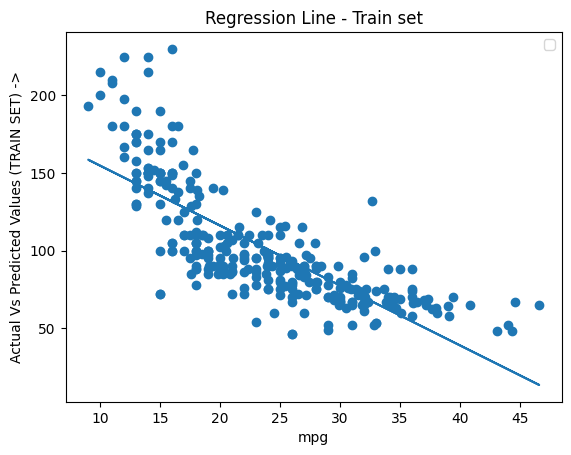

In [25]:
# actual observations
plt.scatter(x_train,y_train) # single feature
#plt.scatter(x_train.iloc[:,0],y_train) # multiple feaures

# predicted values on TRAIN set
plt.plot(x_train,y_train_pred) # single feature
#plt.plot(x_train.iloc[:,0],y_train_pred,label="linear") # multiple feaures..for plot take only one

plt.title("Regression Line - Train set")
plt.xlabel(data.columns[0])
plt.legend()
plt.ylabel("Actual Vs Predicted Values (TRAIN SET) ->")

plt.show()

# Performance on TEST set

In [28]:
# predict model on TEST set
y_pred=lr.predict(x_test)

In [30]:
# Root Mean Square Error
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
print("RMSE (Test)->", rmse)

RMSE (Test)-> 26.249884363968278


In [31]:
# mean_absolute_error
mae=mean_absolute_error(y_test,y_pred)
print("Mean Absolute Error (Test)->", mae)

Mean Absolute Error (Test)-> 19.7076201792483


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


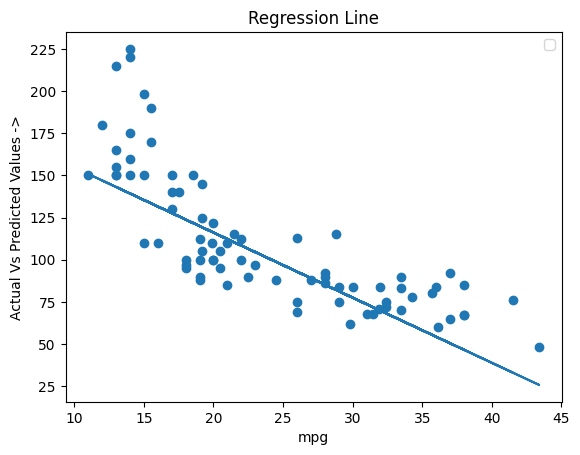

In [32]:
# actual observations
plt.scatter(x_test,y_test) # single-feature
#plt.scatter(x_test.iloc[:,0],y_test) # multiple features

# predicted values
plt.plot(x_test,y_pred) # single-feature
#plt.plot(x_test.iloc[:,0],y_pred)  # multiple features


plt.title("Regression Line")
plt.xlabel(data.columns[0])
plt.ylabel("Actual Vs Predicted Values ->")
plt.legend()

plt.show()

# Predict a new data point

In [34]:
# mpg = 9.5
print(lr.predict([[9.5]]))

[156.63612426]


# Test Goodness of fit 

### R squared i:e coeff of determination

- is a measure of variability in output variable (predicted) explained by input variable (predictors) (i:e <b>it evaluates how closely y values scatter around your regression line</b>, the closer they are to your regression line the better)
- takes a value between <b>0 (poor fit) and 1 (good fit)</b>
- shouldnot be taken as sole criteria to judge that linear model is adequate
- <b>comes with an inherent problem</b> – additional input variables will make the R-squared stay the same or increase (this is due to how the R-squared is calculated mathematically). Therefore, even if the additional input variables show no relationship with the output variables, the R-squared will increase

In [35]:
# R Squared value
r_squared=r2_score(y_test,y_pred)
print("R squared i:e coeff of determination ->",r_squared)

R squared i:e coeff of determination -> 0.5713789611206648


### Adjusted R squared
- The <b> ADJUSTED R-squared </b> is a modified version of R-squared that adjusts for predictors that are not significant in a regression model.
- The adjusted R-squared <b>looks at whether additional input variables are contributing to the model.</b>
- An indicator of whether adding additional predictors improve a regression model or not
- A <b>lower adjusted R-squared</b> indicates that the additional input variables are not adding value to the model.
- A <b>higher adjusted R-squared</b> indicates that the additional input variables are adding value to the model.

In [36]:
# no. of samples
n=len(y_test)
# no. of parameters/independent variables
p=x_test.shape[1]

print("n=",n,", p=",p)

adj_rsquared=1-((1-r_squared)*(n-1)/(n-p-1))
print("Adjusted R squared ->",adj_rsquared)

n= 79 , p= 1
Adjusted R squared -> 0.5658124541222319


## Add additonal input features and see the effect on R-squared and Adj R squared

#### Additional feature

In [37]:
data=pd.read_excel("/home/unni/Documents/ml/dataset/auto-mpg.xlsx",na_values=["?"])
#print(data.iloc[:,[0,3]])
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [38]:
data.dropna(axis='index',inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car name      392 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB


In [40]:
# independent variable
x=data.iloc[:,[0,1]] # mpg and cylinders

print(x.shape)
print(x[:6])

# dependent variable / target variable
y=data.iloc[:,3]
print(y[:6])
print(y.shape)

(392, 2)
    mpg  cylinders
0  18.0          8
1  15.0          8
2  18.0          8
3  16.0          8
4  17.0          8
5  15.0          8
0    130.0
1    165.0
2    150.0
3    150.0
4    140.0
5    198.0
Name: horsepower, dtype: float64
(392,)


In [41]:
# divide into train and test set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

print("x_train.count()=",len(x_train)) # x_train.count()
print("y_train.count()=",y_train.count())
print("x_test.count()=",len(x_test)) # x_test.count()
print("y_test.count()=",y_test.count())

x_train.count()= 313
y_train.count()= 313
x_test.count()= 79
y_test.count()= 79


In [42]:
# initilize model
lr=LinearRegression()

lr.fit(x_train,y_train)

# intercept
print("Interept ->",lr.intercept_)
# coeff
print("coefficient ->",lr.coef_)

Interept -> 71.34224736966021
coefficient -> [-1.64650681 12.97951641]


In [43]:
# predict model on test set
y_pred=lr.predict(x_test)

In [44]:
# Root Mean Square Error

mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
print("RMSE ->", rmse)

RMSE -> 20.430163617083082


In [45]:
# R Squared
r_squared=r2_score(y_test,y_pred)
print("R squared i:e coeff of determination ->",r_squared)

R squared i:e coeff of determination -> 0.7403655094103322


In [46]:
# Adjusted R Squared

# no. of samples
n=len(y_test)
# no. of parameters/independent variables
p=x_test.shape[1]

print("n=",n,", p=",p)

adj_rsquared=1-((1-r_squared)*(n-1)/(n-p-1))
print("Adjusted R squared ->",adj_rsquared)

n= 79 , p= 2
Adjusted R squared -> 0.7335330228158672


### What do you understand from above ?? Is adding additional feature adding value ???

# Hypothesis Tests
As per <b>NULL Hypothesis</b> , Reduced model (y = b0) is sufficient and not y = b0 + b1x1 + b2x2...+bnxn  i:e Input features (x1,x2..xn) have no effect on Dependent/Target variable (y)...i:e b1 (beta 1), b2..bn= 0 ; Only b0 (beta 0, Intercept/bias) sufficient to explain model

We reject the Null Hypothesis, if p-value ("P>|t|" column) <0.05. So variables whose p-value < 0.05 are significant. Reject other variables whose p-value>0.05

In [48]:
data=pd.read_excel("/home/unni/Documents/ml/dataset/auto-mpg.xlsx",na_values=["?"])
data.head()

data.dropna(axis='index',inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car name      392 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB


In [49]:
# independent variable..take all
x=data.iloc[:,[0,1,2,4,5,6,7]]

print(x.shape)
print(x[:6])

# dependent variable / target variable
y=data.iloc[:,3]
print(y[:6])
print(y.shape)

(392, 7)
    mpg  cylinders  displacement  weight  acceleration  model year  origin
0  18.0          8         307.0    3504          12.0          70       1
1  15.0          8         350.0    3693          11.5          70       1
2  18.0          8         318.0    3436          11.0          70       1
3  16.0          8         304.0    3433          12.0          70       1
4  17.0          8         302.0    3449          10.5          70       1
5  15.0          8         429.0    4341          10.0          70       1
0    130.0
1    165.0
2    150.0
3    150.0
4    140.0
5    198.0
Name: horsepower, dtype: float64
(392,)


In [50]:
# divide into train and test set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

print("x_train.count()=",len(x_train)) # x_train.count()
print("y_train.count()=",y_train.count())
print("x_test.count()=",len(x_test)) # x_test.count()
print("y_test.count()=",y_test.count())

x_train.count()= 313
y_train.count()= 313
x_test.count()= 79
y_test.count()= 79


In [51]:
x_train_lm=sm.add_constant(x_train)

lm=sm.OLS(y_train,x_train_lm).fit()

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:             horsepower   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     374.3
Date:                Thu, 27 Jul 2023   Prob (F-statistic):          1.26e-145
Time:                        06:31:26   Log-Likelihood:                -1227.7
No. Observations:                 313   AIC:                             2471.
Df Residuals:                     305   BIC:                             2501.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          146.4372     17.589      8.326   

# References

Dataset - https://archive.ics.uci.edu/dataset/9/auto+mpg
https://realpython.com/linear-regression-in-python/ 
https://medium.com/@hackdeploy/python-linear-regression-analysis-7b3cfb01a748
https://realpython.com/linear-regression-in-python/
https://towardsdatascience.com/how-to-simplify-hypothesis-testing-for-linear-regression-in-python-8b43f6917c86
https://medium.com/nerd-for-tech/hypothesis-testing-on-linear-regression-c2a1799ba964